In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as ssp

from DSI_Capstone_Steemit.utils.utils import(
    load_data_and_description,
)
from sklearn.model_selection import train_test_split

import os

data_directory = '../data/'
input_directory = os.path.join(data_directory,'networkx_votes')

def load_joblib(filename):
    return joblib.load(os.path.join(input_directory,filename))

data,feature_names,data_desc = load_data_and_description(data_type='tfidf')
data_desc['log total_payout_value'] = np.log(data_desc['total_payout_value'])



Loading tfidf


/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [2]:
data_desc

,ID,author,permlink,category,last_update,created,active,last_payout,depth,children,...,language,author_reputation_scaled,Cluster,Cluster Condense,Hubs,Authorities,Page Rank,Eigen Centrality,Core K,log total_payout_value
0,200491,xeroc,piston-web-first-open-source-steem-gui---searc...,piston,2016-07-23 12:19:12,2016-07-22 16:14:09,2016-08-23 12:59:18,2016-08-24 14:49:30,0,369,...,en,1.026953,1,NaN,3.459201,3.616528,3.603860,280.668244,3.603860,10.703900
1,91489,guerrint,the-first-steemit-makeup-turtorial-bringing-yo...,beauty,2016-07-16 00:07:51,2016-07-15 22:06:54,2016-08-12 04:31:27,2016-08-23 23:35:30,0,227,...,en,0.308675,1,NaN,3.738064,0.671094,0.240322,56.854373,0.240322,10.190921
2,287772,cass,steemit-chat-foss-alternative-to-slack-deploye...,steemit,2016-07-27 09:47:24,2016-07-27 09:47:24,2016-08-06 10:28:51,2016-08-27 00:34:12,0,145,...,en,0.869053,1,NaN,3.192327,2.697141,1.475234,237.510950,1.475234,10.119363
3,254654,steemdrive,sa-s-city-of-durban-to-be-engulfed-by-steem-th...,money,2016-07-26 00:02:39,2016-07-25 17:43:33,2016-08-17 18:01:18,2016-08-26 00:02:00,0,263,...,en,0.247360,1,NaN,3.230475,3.267387,2.046968,267.130418,2.046968,9.936962
4,146210,infovore,how-steemit-has-changed-my-life-from-living-on...,steem,2016-07-20 01:18:06,2016-07-19 22:01:09,2016-08-21 20:34:39,2016-08-24 14:03:03,0,489,...,en,1.206402,1,NaN,3.459411,1.875116,1.612754,177.978566,1.612754,9.761333
5,81125,jl777,steemit-is-crypto-s-first-mass-market-solution,introduceyourself,2016-07-14 16:32:48,2016-07-14 16:32:48,2016-07-21 12:01:51,2016-08-23 05:21:30,0,66,...,en,0.144451,1,NaN,1.970349,2.501502,2.565264,239.374717,2.565264,9.750315
6,217220,allasyummyfood,7dek2o-hello-steemit-my-name-is-alla-i-am-a-yo...,introduceyourself,2016-07-23 18:27:27,2016-07-23 16:11:45,2016-08-10 10:37:00,2016-08-23 21:05:57,0,455,...,en,0.312533,1,NaN,3.775777,1.471926,0.665179,132.410019,0.665179,9.746436
7,331546,manthostsakirid,the-first-steemit-professional-photoshooting-b...,photography,2016-07-29 11:47:27,2016-07-29 10:15:45,2016-08-14 21:00:51,2016-08-29 09:07:39,0,157,...,en,0.142444,1,NaN,2.986626,1.006484,0.824920,104.332542,0.824920,9.643122
8,452387,dollarvigilante,the-dollar-vigilante-is-now-on-steemit,introduceyourself,2016-08-04 22:26:12,2016-08-04 21:56:36,2016-09-02 20:56:06,2016-09-04 14:23:42,0,257,...,en,1.722317,1,NaN,3.394947,3.143766,2.012869,246.923453,2.012869,9.581765
9,206465,guerrint,steemit-in-the-streets-tara-gets-interviews-an...,steemit,2016-07-22 23:24:30,2016-07-22 23:02:33,2016-08-04 09:37:45,2016-08-25 13:25:30,0,198,...,en,0.308675,1,NaN,3.738064,0.671094,0.240322,56.854373,0.240322,9.572961


In [8]:
idx = data_desc['depth'] != 0

idx.values

array([False, False, False, ...,  True,  True, False], dtype=bool)

In [9]:
data_desc = data_desc[idx]
data = data[idx.values]

In [121]:
y.max()

2652.3299999999999

In [10]:
sns.distplot(data_desc['total_payout_value'])

NameError: name 'sns' is not defined

In [11]:
import joblib

In [12]:
def add_network_features(df):

    hubs,authorities = load_joblib('hits')
    cluster = load_joblib('parts')
    pagerank = load_joblib('prank') 
    eig_cent = load_joblib('eig_cent') 
    core_k = load_joblib('core_k') 

    df['Cluster'] = df['author'].map(cluster)
    df.loc[:,'Cluster Condense'] = df['Cluster']
    df.loc[~df['Cluster'].isin([1,3,0,2,5,4]),'Cluster Condense'] = 'Other'
    df['Hubs'] = df['author'].map(hubs) * 10000
    df['Authorities'] = df['author'].map(authorities) * 10000
    df['Page Rank'] = df['author'].map(pagerank) * 10000
    df['Eigen Centrality'] = df['author'].map(eig_cent)* 10000
    df['Core K'] = df['author'].map(core_k)*10000
    return df
data_desc = add_network_features(data_desc)

network_cols = ['Page Rank','Cluster','Hubs','Authorities','Eigen Centrality']

In [154]:

# Remove middle value articles

# idx1 = data_desc['log total_payout_value'] < 1.2
# idx2 = data_desc['log total_payout_value'] >2.5

# idx_not = (~idx1) & (~idx2)

data_desc = data_desc
data = data[:,:]
# y = data_desc['log total_payout_value'] >2.5

# For Regression
y = data_desc['total_payout_value']

value_counts = data_desc['category'].value_counts()
top_categories = value_counts.index[value_counts > np.percentile(data_desc['category'].value_counts(),97)]
idx = data_desc['category'].isin(top_categories)
data_desc['top category'] = idx.astype(int)

data_desc['top category listed'] = data_desc.ix[data_desc['top category'].values.astype(bool) ,'category']

data_desc['top category listed'] = data_desc['top category listed'].fillna('Other')


post_features = ['number of body tags',
                                   'number of body urls',
                                   'number of image urls',
                                   'number of body mentions',
                                   'number of image urls',
                                   'number of youtube urls',
                                   'language',
                                   'author_reputation_scaled',
                                   'number of steem counts',
                                'top category'] + network_cols


train_features = data_desc.ix[:,post_features].fillna(0)

train = pd.get_dummies(train_features)

# num_image_urls = train['number of image urls'].values[:,0]
# train.drop('number of image urls',axis = 1, inplace=True)

train['number of image urls'] = num_image_urls

training_names = train.columns

train_sparse = ssp.csr_matrix(train)
new_data = ssp.hstack([data,train_sparse])
train = new_data.tocsr()

# All samples
number_of_samples = train.shape[0]


# from sklearn.feature_selection import VarianceThreshold
# selector = VarianceThreshold()
# print data.shape
# train = selector.fit_transform(train)




X_train, X_test, y_train, y_test = train_test_split(
    train, y, test_size=0.33, random_state=42)


In [120]:
y_train.max()

2360.8899999999999

In [155]:
idx = selector.get_support()


all_features = np.array(feature_names + list(training_names))

In [156]:
print X_train.shape, len(all_features)

(14412, 21348) 21348


In [157]:
for i in y_train:
    print i

10.74
3.16
11.5
1.42
13.4
0.66
0.98
396.32
0.62
0.75
7.75
0.82
1.76
0.57
6.24
27.71
1.54
3.16
0.72
1.07
6.55
0.8
1.58
1.34
0.45
0.46
0.47
0.5
184.1
0.53
0.45
2.3
0.47
19.64
0.55
1.28
1.49
0.42
1.3
0.66
0.78
35.04
0.47
8.33
3.2
0.66
19.54
0.5
2.08
3.18
23.59
29.41
0.65
83.76
17.31
1.26
1.13
0.43
1.5
33.24
2.04
1.24
2.09
4.12
1.9
0.89
2.41
1.73
264.93
43.04
1.21
67.02
1.08
0.65
1.53
1.53
16.48
1.69
0.44
10.25
1.33
25.11
2.71
1.86
0.76
1.98
1566.62
0.6
0.69
0.45
1.77
6.32
3.39
0.58
0.54
0.69
1.5
0.47
0.68
1.19
0.95
4.1
6.95
0.44
9.9
0.61
1.31
1.0
1.1
4.66
1.02
0.54
0.42
0.92
0.71
1.24
7.42
7.26
38.98
1.56
0.84
1.95
1.17
1.04
1.11
0.67
1.09
3.07
1.82
0.43
0.99
7.99
0.57
3.43
0.72
4.38
0.72
0.62
0.57
0.71
0.66
0.92
3.24
0.58
0.77
0.76
0.55
0.65
0.59
0.42
9.99
1.35
0.42
4.47
14.58
38.75
0.53
0.65
0.55
0.49
0.72
1.8
1.48
20.61
0.5
0.52
1.6
0.74
1.27
300.47
0.47
1.21
0.44
1.28
0.68
0.47
70.12
2.58
26.0
0.74
0.48
0.5
1.21
0.9
2.91
0.42
0.74
32.97
9.99
0.8
4.19
0.61
0.48
0.96
1.04
0.76
0.66
0.55

In [158]:

import xgboost as xgb

xgtrain = xgb.DMatrix(X_train, label=y_train)

def xgb_evaluate(min_child_weight,
                 colsample_bytree,
                 max_depth,
                 subsample,
                 gamma,
                 alpha,learning_rate,reg_alpha,reg_lambda,scale_pos_weight):

    params['min_child_weight'] = int(min_child_weight)
    params['cosample_bytree'] = max(min(colsample_bytree, 1), 0)
    params['max_depth'] = int(max_depth)
    params['subsample'] = max(min(subsample, 1), 0)
    params['gamma'] = max(gamma, 0)
    params['alpha'] = max(alpha, 0)
    params['learning_rate'] = max(learning_rate, 0)
    params['reg_alpha'] = max(reg_alpha, 0)
    params['reg_lambda'] = max(reg_lambda, 0)
    params['scale_pos_weight'] =  max(scale_pos_weight, 0)




    cv_result = xgb.cv(params, xgtrain, 
                       num_boost_round=num_boost_round, nfold=5,
             seed=random_state,
#              callbacks=[xgb.callback.early_stop(50)]
                      )

    return -cv_result['test-mae-mean'].mean()


num_boost_round = 10

random_state = 2016

# For Bayesian Optimization
num_iter = 30
init_points = 5
params = {
    'eta': 0.05,
    'silent': 0,
    'eval_metric': ['mae'],
    'objective':'reg:linear',
    'verbose_eval': True,
    'seed': random_state
}

In [159]:
import time

start = time.time()
import xgboost as xgb
from bayes_opt import BayesianOptimization

xgbBO = BayesianOptimization(xgb_evaluate, {'min_child_weight': (1, 20),
                                            'colsample_bytree': (0.1, 1),
                                            'max_depth': (1, 15),
                                            'subsample': (0.5, 1),
                                            'gamma': (0, 10),
                                            'reg_lambda': (0, 10),
                                            'learning_rate': (0.001,1),
                                            'reg_alpha' : (0,2),
                                            'alpha':(0,2),
                                            'scale_pos_weight':(0,2)
                                            })
xgbBO.maximize(init_points=init_points, n_iter=num_iter)

print(xgbBO.res['max'])
print(xgbBO.res['all'])

end = time.time()
print 'Final Time'
print(end - start)



Initialization
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |     alpha |   colsample_bytree |     gamma |   learning_rate |   max_depth |   min_child_weight |   reg_alpha |   reg_lambda |   scale_pos_weight |   subsample | 
    1 | 00m01s |  -23.79246 |    1.6083 |             0.4123 |    1.2528 |          0.8750 |     11.4853 |            18.2210 |      0.9801 |       6.5978 |             0.4699 |      0.7611 | 
    2 | 00m01s |  -21.71602 |    0.0216 |             0.6841 |    0.7305 |          0.9961 |      3.5628 |             6.7986 |      1.9198 |       3.8592 |             1.7811 |      0.7672 | 
    3 | 00m02s |  -20.71938 |    0.7810 |             0.9093 |    7.4181 |          0.6070 |     12.4340 |             6.1721 |      1.0651 |       7.7971 |             0.5256 |      0.5427 | 
    4 | 00m01s |  -20

In [160]:
# xgbBO.points_to_csv('bayesian_results.csv')
# import json
# with open('bayesian_results.json', 'w') as fp:
#     json.dump(xgbBO.res, fp)




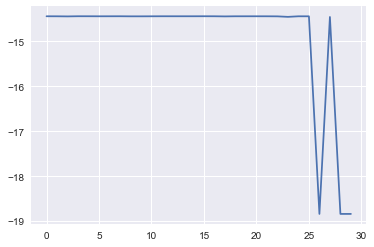

In [161]:
import matplotlib.pylab as plt
%matplotlib inline 
plt.plot(np.array(xgbBO.res['all']['values']))

In [162]:
param_max = xgbBO.res['max']['max_params']

In [163]:
param_max.pop('alpha')

0.0

In [164]:
param_max['max_depth'] = int(param_max['max_depth'])

In [165]:
model = xgb.XGBRegressor(**xgbBO.res['max']['max_params'])
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1.0,
       gamma=0.0, learning_rate=0.001, max_delta_step=0, max_depth=1,
       min_child_weight=20.0, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0.0, reg_lambda=0.0,
       scale_pos_weight=5.5511151231257827e-17, seed=0, silent=True,
       subsample=1.0)

In [166]:
y_train

46653      10.74
70232       3.16
44898      11.50
82700       1.42
40934      13.40
98469       0.66
89872       0.98
3761      396.32
99946       0.62
95465       0.75
54615       7.75
93548       0.82
79220       1.76
102393      0.57
59432       6.24
24407      27.71
81406       1.54
70230       3.16
96239       0.72
88188       1.07
58441       6.55
93880       0.80
80904       1.58
83830       1.34
108967      0.45
108012      0.46
107284      0.47
105824      0.50
7471      184.10
104172      0.53
           ...  
110181      0.43
47402      10.42
105885      0.50
3967      372.20
43333      12.19
104377      0.52
105500      0.50
80289       1.65
72492       2.69
107400      0.47
109989      0.43
102509      0.57
72610       2.67
66417       4.17
67666       3.82
38043      15.02
12249      84.59
27362      23.53
79120       1.77
99140       0.64
88037       1.07
95691       0.74
62188       5.42
101010      0.60
71888       2.82
87819       1.09
89622       0.99
68042       3.

In [167]:
predictions = model.predict(X_test)

In [168]:
import seaborn as sns

In [169]:
from sklearn.metrics import r2_score,mean_absolute_error

In [170]:
predictions

array([ 1.82829213,  1.82829213,  1.82829213, ...,  1.82829213,
        1.82829213,  1.82829213], dtype=float32)

-7150.09509679
13.8689192475


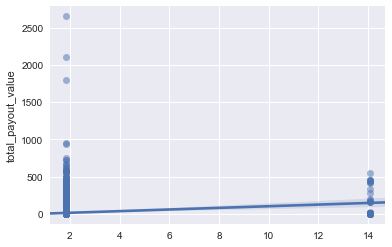

In [171]:
sns.regplot(predictions,y_test,
            scatter_kws={'alpha':0.5}
           )

print r2_score(y_pred=y_test,y_true=predictions)
print mean_absolute_error(y_pred=y_test,y_true=predictions)




In [172]:
features = pd.DataFrame([model.feature_importances_,all_features]).T

In [173]:
features.columns = ['Importance','Feature']

In [174]:
features = features[features['Importance'] != 0]

In [175]:
features = features.sort_values('Importance',
                                ascending=False).reset_index(drop = True)

In [176]:
features

,Importance,Feature
0,1,marijuana
